In [4]:
import pandas as pd
import seaborn as sns

# Carica il dataset
df = pd.read_csv("../Dataset/dfPlayerTrophies_2025.csv")
df_trophies = df[['rank']].copy()
trophies = df.columns[5:]
df_trophies['trophies'] = df[trophies].notna().sum(axis=1)
display(df_trophies)

,rank,trophies
0,1st,0
1,2nd,1
2,3rd,1
3,1st,2
4,2nd,0
...,...,...
199,2nd,3
200,3rd,1
201,1st,2
202,2nd,2


C:\Users\matti\AppData\Local\Temp\ipykernel_19800\2049595913.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='rank', y='trophies', data=df_trophies, jitter=True, palette=rank_colors)


NameError: name 'plt' is not defined

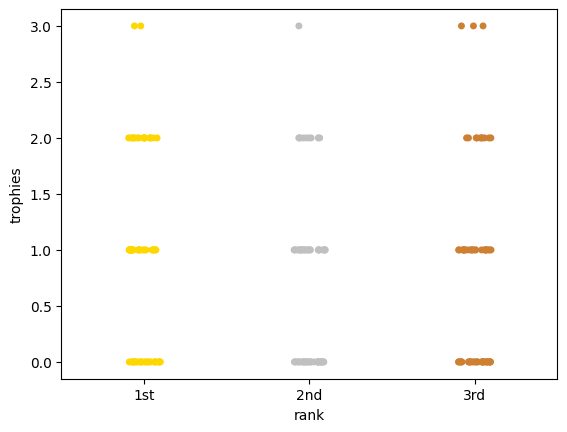

In [8]:
rank_colors = {
    '1st': '#FFD700',   # Oro
    '2nd': '#C0C0C0',   # Argento
    '3rd': '#CD7F32'    # Bronzo
}

# Stripplot
sns.stripplot(x='rank', y='trophies', data=df_trophies, jitter=True, palette=rank_colors)
plt.yticks([0,1,2,3])
plt.show()

In [7]:
df_group = df_trophies.groupby("rank").sum()
display(df_group)

,trophies
rank,
1st,65
2nd,47
3rd,53


In [5]:
# Versione ultra-semplificata
trophy_columns = df.columns[5:]
results = []

# Per ogni trofeo
for trophy in trophy_columns:
    data = df[df[trophy].notna()]
    if len(data) > 0:
        counts = data['rank'].value_counts()
        results.append({
            'trophy': trophy,
            'total': len(data),
            '1st': counts.get('1st', 0),
            '2nd': counts.get('2nd', 0),
            '3rd': counts.get('3rd', 0)
        })

# Chi non ha trofei
no_trophies = df[trophy_columns].isna().all(axis=1)
if no_trophies.any():
    data = df[no_trophies]
    counts = data['rank'].value_counts()
    results.append({
        'trophy': 'nessun_trofeo',
        'total': len(data),
        '1st': counts.get('1st', 0),
        '2nd': counts.get('2nd', 0),
        '3rd': counts.get('3rd', 0)
    })

# DataFrame finale
trophy_rank_df_final = pd.DataFrame(results).sort_values('total', ascending=False).reset_index(drop=True)
trophy_rank_df_final

,trophy,total,1st,2nd,3rd
0,nessun_trofeo,87,24,32,31
1,champions,45,18,14,13
2,laLiga,31,14,8,9
3,serieA,21,8,5,8
4,coppaSpagna,13,5,4,4
5,Mondiale,10,4,3,3
6,Europeo,10,4,3,3
7,europaLeague,7,2,1,4
8,coppaItalia,5,1,2,2
9,premierLeague,5,1,3,1


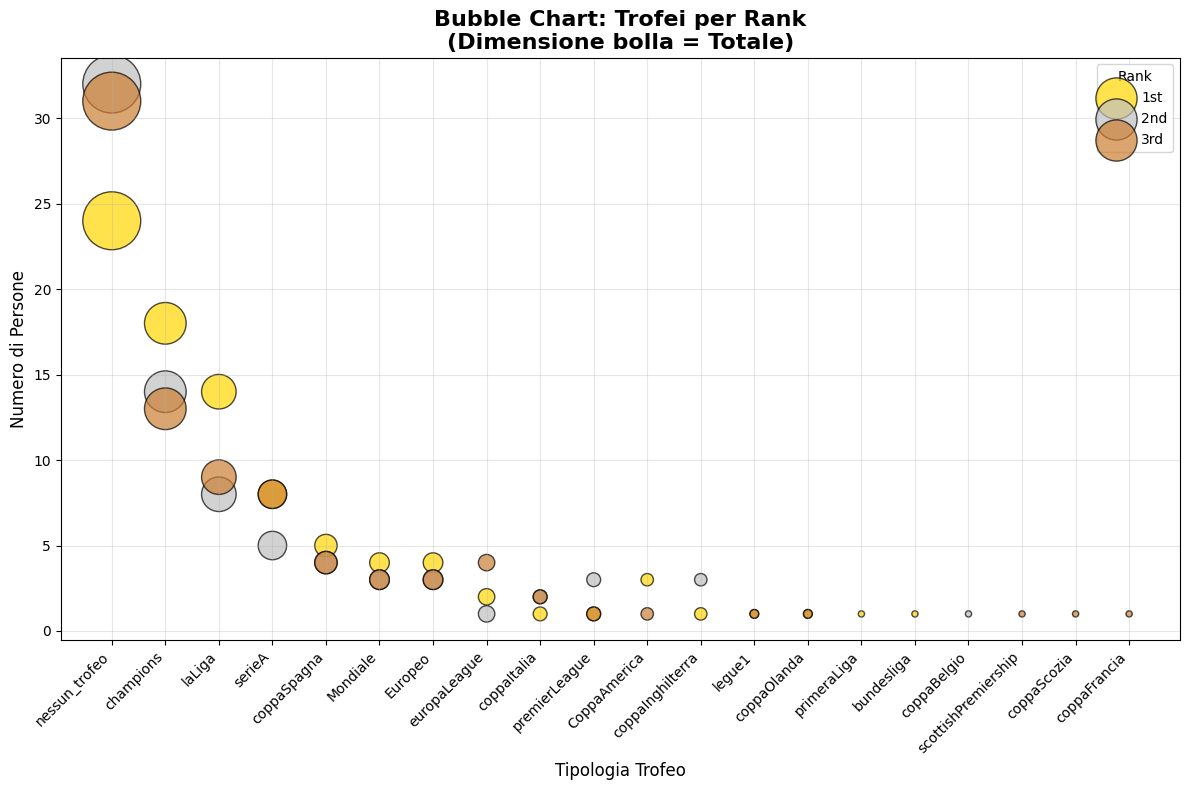

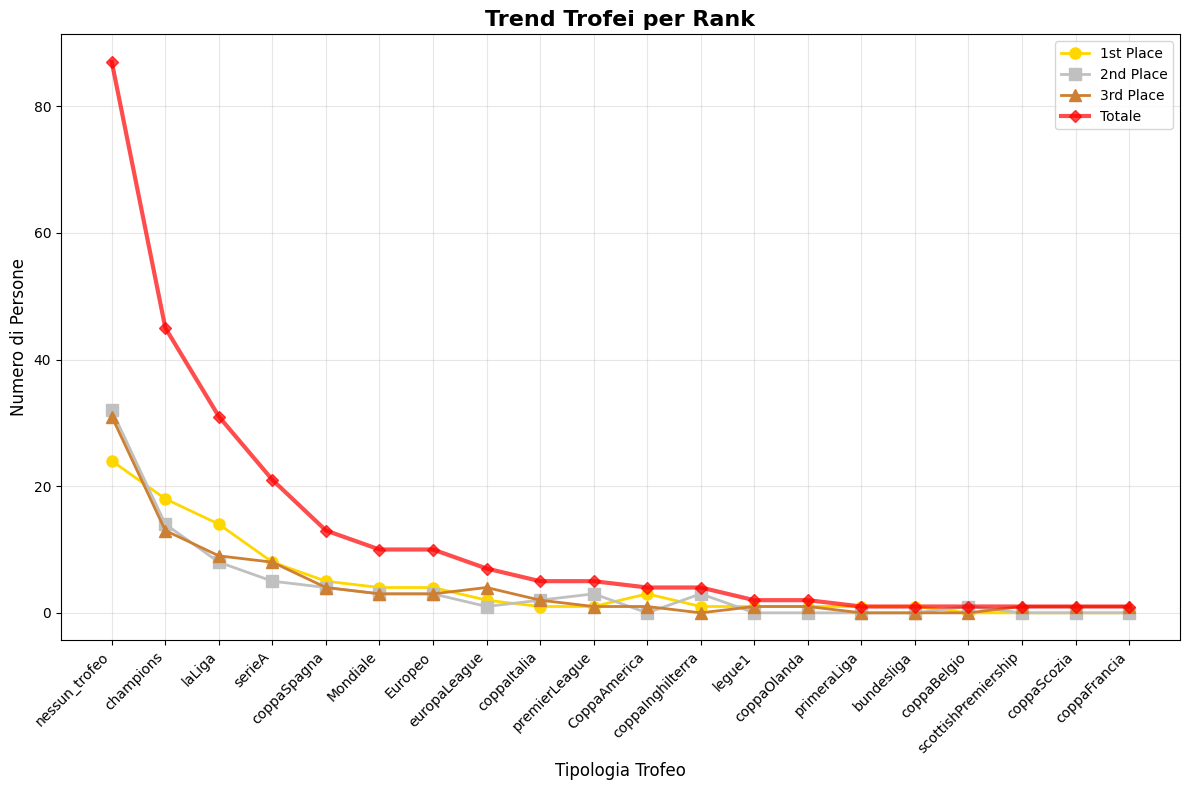

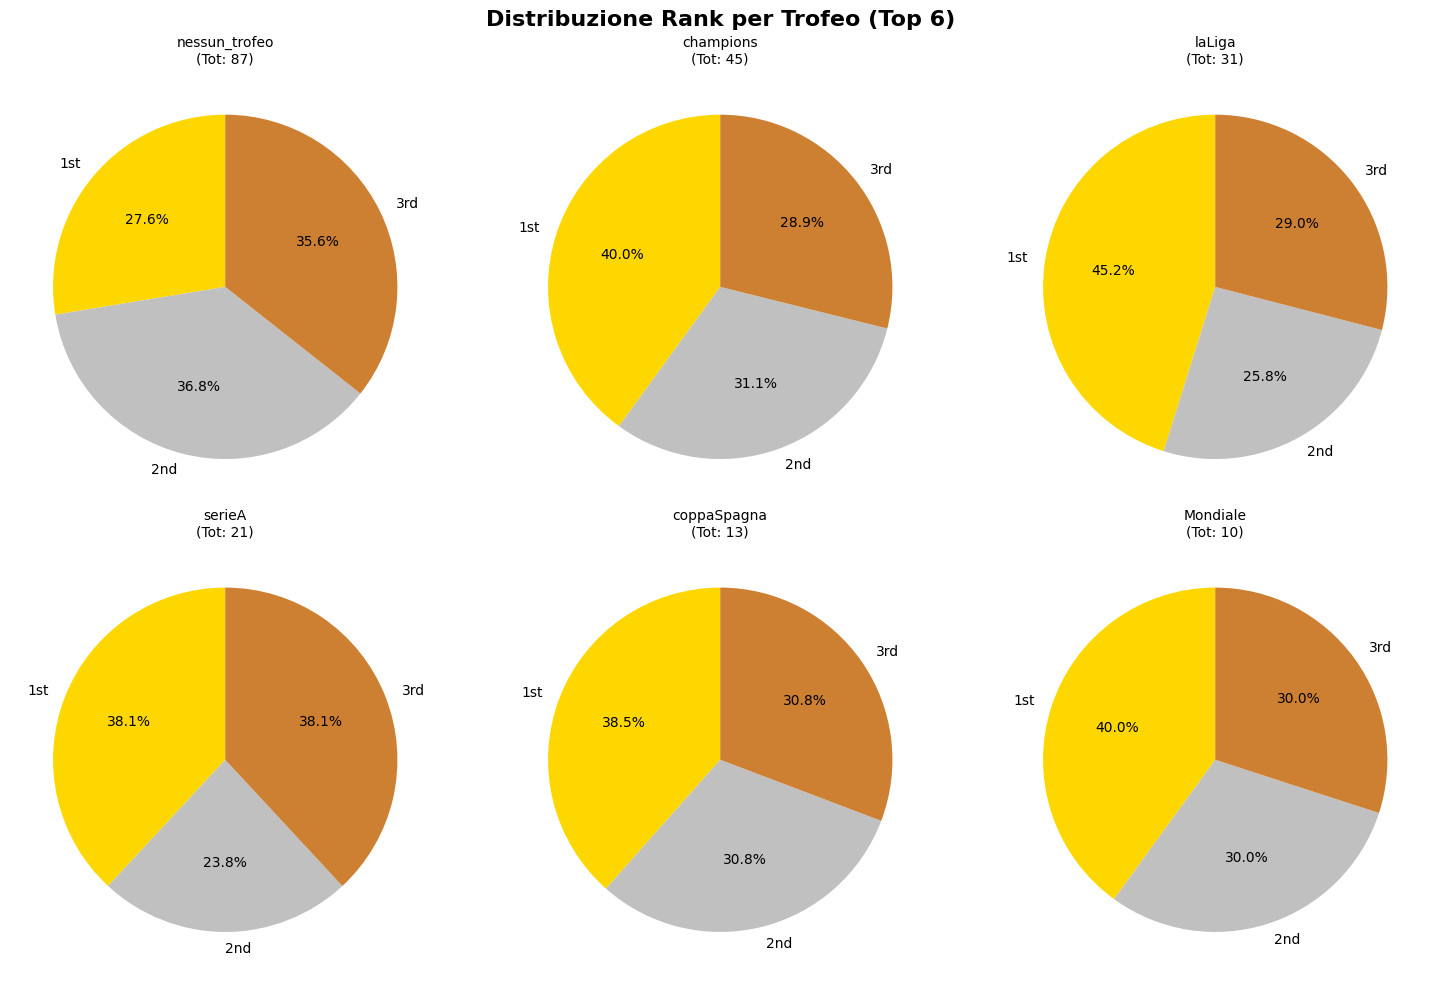

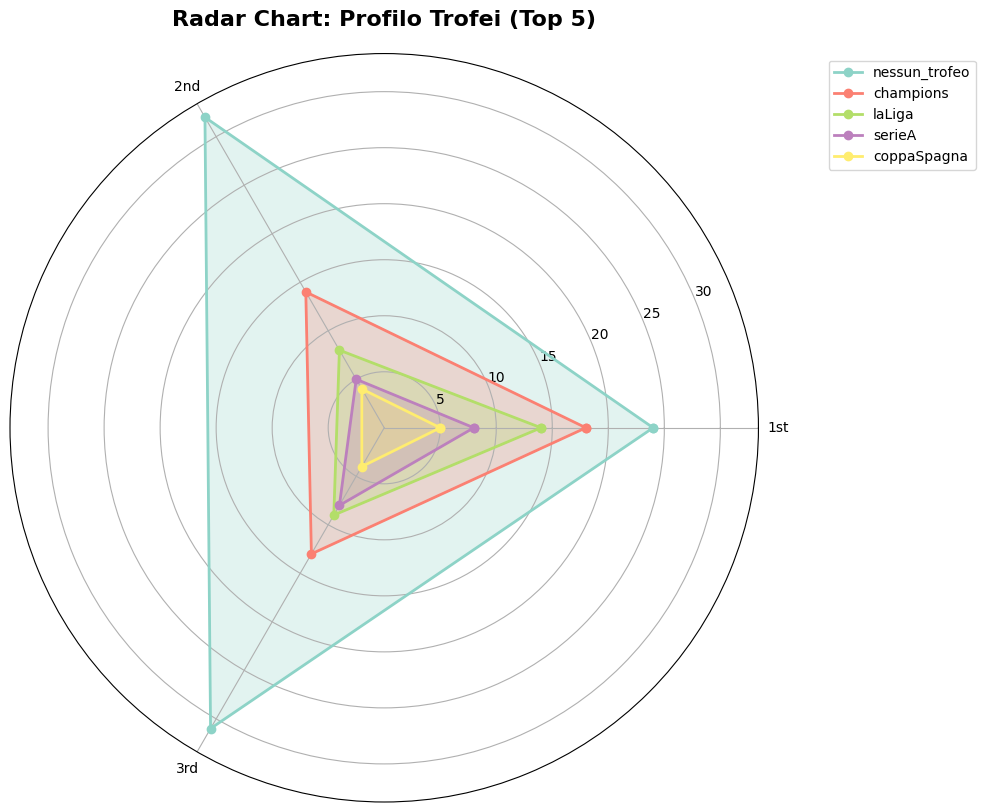

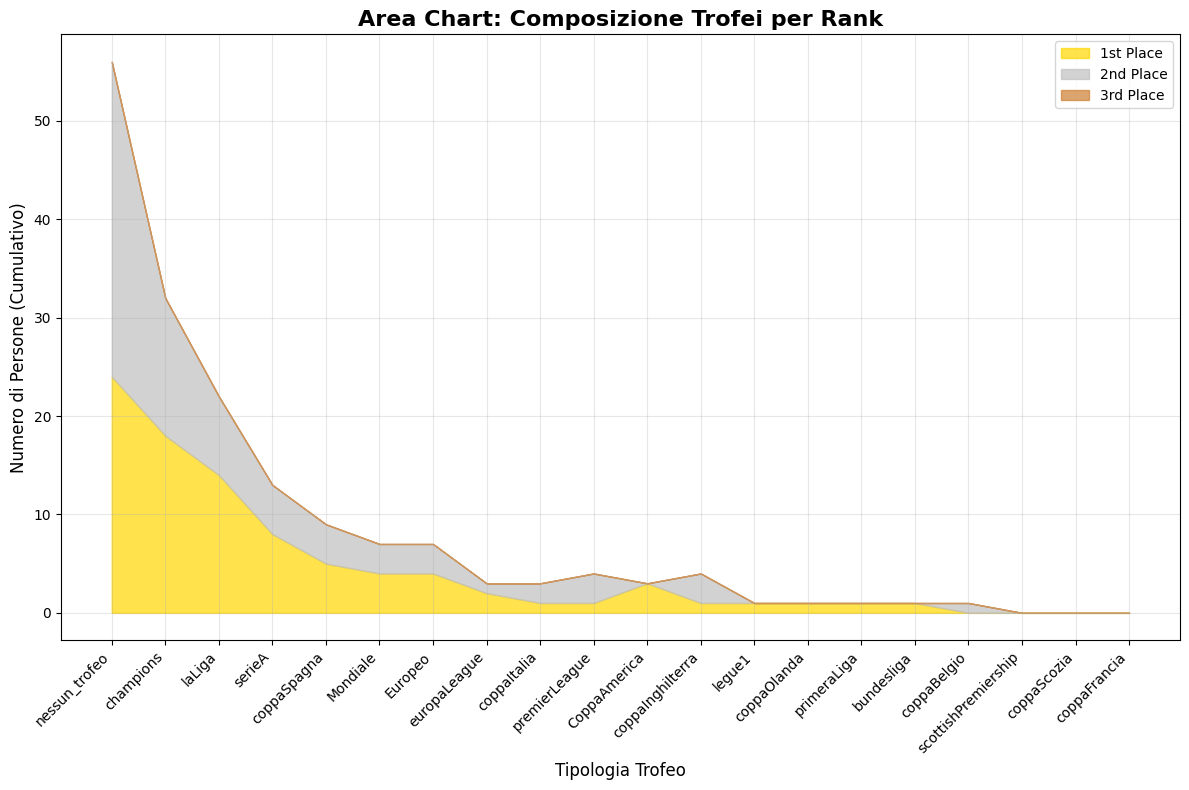

C:\Users\matti\AppData\Local\Temp\ipykernel_19800\696847597.py:185: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_long, x='trophy', y='rank_numeric', palette='viridis')


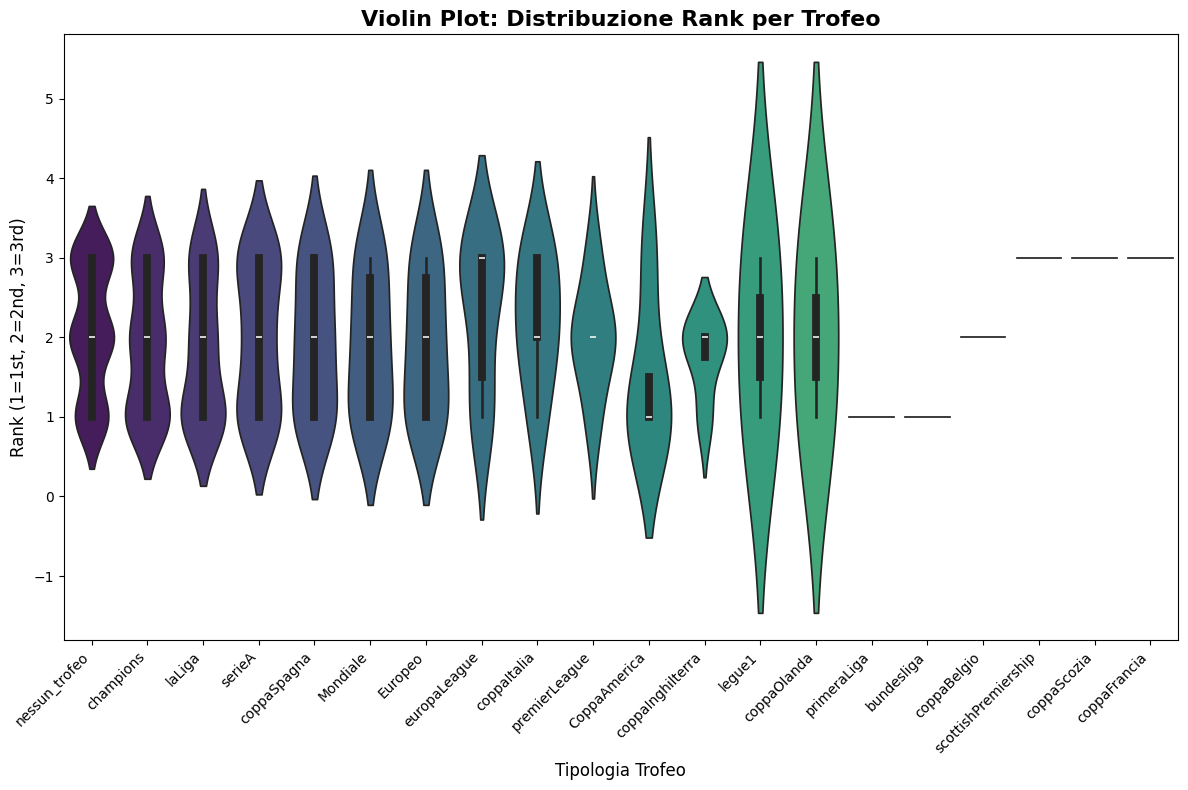

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# OPZIONE 1: Scatter Plot con dimensioni variabili
def create_bubble_chart(trophy_rank_df_final):
    """Bubble chart dove la dimensione rappresenta il totale"""
    
    # Prepariamo i dati in formato lungo
    data_long = []
    for _, row in trophy_rank_df_final.iterrows():
        for rank in ['1st', '2nd', '3rd']:
            if row[rank] > 0:
                data_long.append({
                    'trophy': row['trophy'],
                    'rank': rank,
                    'count': row[rank],
                    'total': row['total']
                })
    
    df_long = pd.DataFrame(data_long)
    
    plt.figure(figsize=(12, 8))
    
    # Colori diversi per ogni rank
    colors = {'1st': 'gold', '2nd': 'silver', '3rd': '#CD7F32'}
    
    for rank in ['1st', '2nd', '3rd']:
        data = df_long[df_long['rank'] == rank]
        plt.scatter(data['trophy'], data['count'], 
                   s=data['total']*20,  # Dimensione proporzionale al totale
                   c=colors[rank], alpha=0.7, label=rank, edgecolors='black')
    
    plt.title('Bubble Chart: Trofei per Rank\n(Dimensione bolla = Totale)', fontsize=16, fontweight='bold')
    plt.xlabel('Tipologia Trofeo', fontsize=12)
    plt.ylabel('Numero di Persone', fontsize=12)
    plt.legend(title='Rank')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# OPZIONE 2: Grafico a linee
def create_line_chart(trophy_rank_df_final):
    """Grafico a linee per confrontare i trend"""
    
    plt.figure(figsize=(12, 8))
    
    x = range(len(trophy_rank_df_final))
    
    plt.plot(x, trophy_rank_df_final['1st'], 'o-', linewidth=2, 
             markersize=8, label='1st Place', color='gold')
    plt.plot(x, trophy_rank_df_final['2nd'], 's-', linewidth=2, 
             markersize=8, label='2nd Place', color='silver')
    plt.plot(x, trophy_rank_df_final['3rd'], '^-', linewidth=2, 
             markersize=8, label='3rd Place', color='#CD7F32')
    plt.plot(x, trophy_rank_df_final['total'], 'D-', linewidth=3, 
             markersize=6, label='Totale', color='red', alpha=0.7)
    
    plt.title('Trend Trofei per Rank', fontsize=16, fontweight='bold')
    plt.xlabel('Tipologia Trofeo', fontsize=12)
    plt.ylabel('Numero di Persone', fontsize=12)
    plt.xticks(x, trophy_rank_df_final['trophy'], rotation=45, ha='right')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# OPZIONE 3: Grafico a torta multiplo
def create_multiple_pie_charts(trophy_rank_df_final):
    """Grafici a torta per ogni trofeo significativo"""
    
    # Prendiamo i top 6 trofei per chiarezza
    top_trophies = trophy_rank_df_final.head(6)
    
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()
    
    colors = ['gold', 'silver', '#CD7F32']
    
    for i, (_, row) in enumerate(top_trophies.iterrows()):
        if i >= 6:
            break
            
        values = [row['1st'], row['2nd'], row['3rd']]
        labels = ['1st', '2nd', '3rd']
        
        # Rimuoviamo valori zero
        non_zero = [(v, l, c) for v, l, c in zip(values, labels, colors) if v > 0]
        if non_zero:
            values, labels, colors_filtered = zip(*non_zero)
            
            axes[i].pie(values, labels=labels, colors=colors_filtered, autopct='%1.1f%%', 
                       startangle=90)
            axes[i].set_title(f"{row['trophy']}\n(Tot: {row['total']})", fontsize=10)
    
    # Nascondiamo gli assi vuoti
    for i in range(len(top_trophies), 6):
        axes[i].set_visible(False)
    
    plt.suptitle('Distribuzione Rank per Trofeo (Top 6)', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# OPZIONE 4: Radar Chart (grafico ragnatela)
def create_radar_chart(trophy_rank_df_final):
    """Radar chart per confrontare profili dei trofei"""
    
    # Prendiamo i top 5 trofei
    top_5 = trophy_rank_df_final.head(5)
    
    # Normalizziamo i valori per il radar
    categories = ['1st', '2nd', '3rd']
    
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
    
    # Angoli per i 3 assi
    angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]  # Chiudiamo il cerchio
    
    colors = plt.cm.Set3(np.linspace(0, 1, len(top_5)))
    
    for i, (_, row) in enumerate(top_5.iterrows()):
        values = [row['1st'], row['2nd'], row['3rd']]
        values += values[:1]  # Chiudiamo il cerchio
        
        ax.plot(angles, values, 'o-', linewidth=2, label=row['trophy'], color=colors[i])
        ax.fill(angles, values, alpha=0.25, color=colors[i])
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_title('Radar Chart: Profilo Trofei (Top 5)', fontsize=16, fontweight='bold', pad=20)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    
    plt.tight_layout()
    plt.show()

# OPZIONE 5: Area Chart (grafico ad area)
def create_area_chart(trophy_rank_df_final):
    """Grafico ad area impilato"""
    
    plt.figure(figsize=(12, 8))
    
    x = range(len(trophy_rank_df_final))
    
    plt.fill_between(x, 0, trophy_rank_df_final['1st'], 
                     alpha=0.7, color='gold', label='1st Place')
    plt.fill_between(x, trophy_rank_df_final['1st'], 
                     trophy_rank_df_final['1st'] + trophy_rank_df_final['2nd'],
                     alpha=0.7, color='silver', label='2nd Place')
    plt.fill_between(x, trophy_rank_df_final['1st'] + trophy_rank_df_final['2nd'],
                     trophy_rank_df_final['total'] - trophy_rank_df_final['3rd'],
                     alpha=0.7, color='#CD7F32', label='3rd Place')
    
    plt.title('Area Chart: Composizione Trofei per Rank', fontsize=16, fontweight='bold')
    plt.xlabel('Tipologia Trofeo', fontsize=12)
    plt.ylabel('Numero di Persone (Cumulativo)', fontsize=12)
    plt.xticks(x, trophy_rank_df_final['trophy'], rotation=45, ha='right')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# OPZIONE 6: Violin Plot
def create_violin_plot(trophy_rank_df_final):
    """Violin plot per visualizzare la distribuzione"""
    
    # Prepariamo i dati in formato lungo
    data_long = []
    for _, row in trophy_rank_df_final.iterrows():
        # Aggiungiamo ogni persona come riga separata
        for rank in ['1st', '2nd', '3rd']:
            for _ in range(int(row[rank])):
                data_long.append({
                    'trophy': row['trophy'],
                    'rank': rank,
                    'rank_numeric': {'1st': 1, '2nd': 2, '3rd': 3}[rank]
                })
    
    if data_long:  # Solo se abbiamo dati
        df_long = pd.DataFrame(data_long)
        
        plt.figure(figsize=(12, 8))
        sns.violinplot(data=df_long, x='trophy', y='rank_numeric', palette='viridis')
        
        plt.title('Violin Plot: Distribuzione Rank per Trofeo', fontsize=16, fontweight='bold')
        plt.xlabel('Tipologia Trofeo', fontsize=12)
        plt.ylabel('Rank (1=1st, 2=2nd, 3=3rd)', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

# UTILIZZO:
# create_bubble_chart(trophy_rank_df_final)        # Bubble chart
# create_line_chart(trophy_rank_df_final)          # Grafico a linee  
# create_multiple_pie_charts(trophy_rank_df_final) # Torte multiple
# create_radar_chart(trophy_rank_df_final)         # Radar chart
# create_area_chart(trophy_rank_df_final)          # Area chart
# create_violin_plot(trophy_rank_df_final)         # Violin plot

# Per vedere tutte le alternative:
def show_all_alternatives(trophy_rank_df_final):
    create_bubble_chart(trophy_rank_df_final)
    create_line_chart(trophy_rank_df_final)
    create_multiple_pie_charts(trophy_rank_df_final)
    create_radar_chart(trophy_rank_df_final)
    create_area_chart(trophy_rank_df_final)
    create_violin_plot(trophy_rank_df_final)

show_all_alternatives(trophy_rank_df_final)

In [8]:
df_player = df[df['rank'] == '1st'][['rank', 'player', 'nazionality']].copy()
df_player_group = df_player.groupby(['player', 'nazionality']).size().reset_index(name='count')
df_player_group = df_player_group.sort_values(by=['count','nazionality'], ascending=False)
print(df_player_group)

                    player       nazionality  count
24            Lionel Messi         Argentina      8
4        Cristiano Ronaldo        Portogallo      5
17            Johan Cruyff            Olanda      3
29        Marco van Basten            Olanda      3
32          Michel Platini           Francia      3
0       Alfredo Di Stéfano            Spagna      2
42                 Ronaldo        Portogallo      2
22            Kevin Keegan       Inghilterra      2
9        Franz Beckenbauer          Germania      2
21   Karl-Heinz Rummenigge          Germania      2
8           Flórián Albert          Ungheria      1
2        Andriy Shevchenko           Ucraina      1
15            Igor Belanov           Ucraina      1
33            Oleg Blokhin           Ucraina      1
26  Luis Suárez Miramontes            Spagna      1
40                   Rodri            Spagna      1
5                Denis Law            Scozia      1
23              Lev Yashin            Russia      1
18          

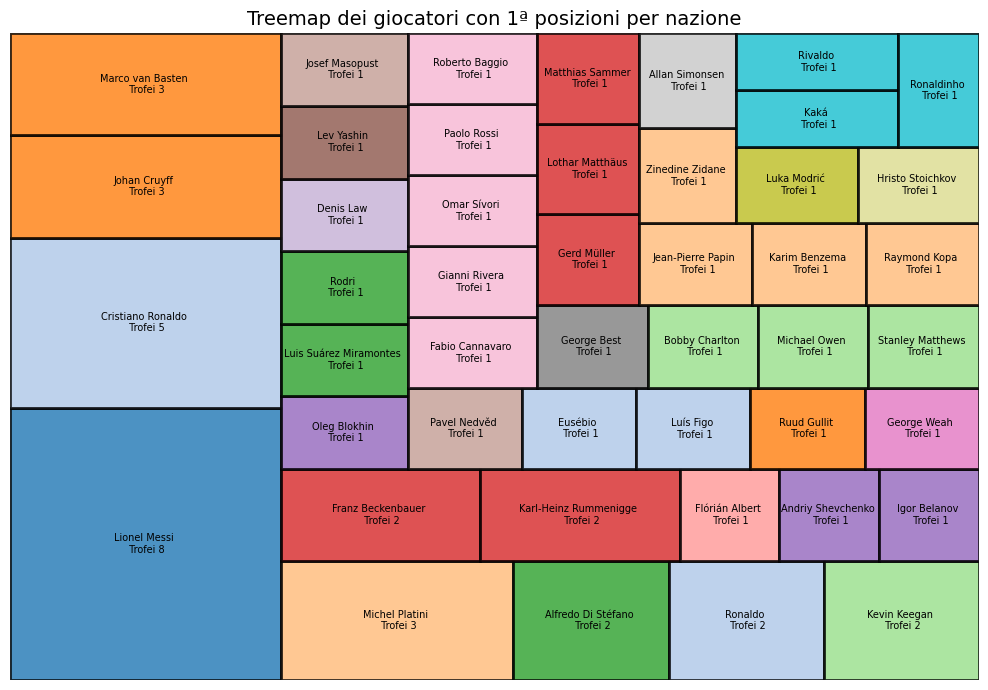

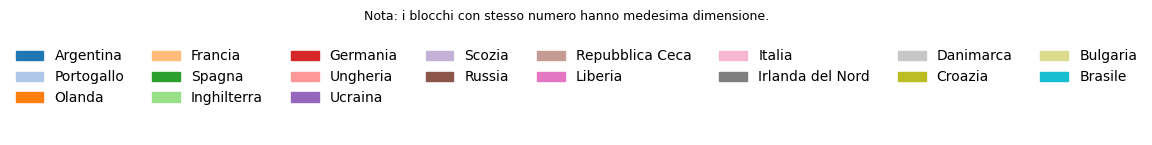

In [19]:
import squarify
df_treemap = df_player_group.sort_values(by='count', ascending=False)

# Colori per ogni nazionalità
nazionalita_unique = df_treemap['nazionality'].unique()
color_map = {naz: plt.cm.tab20(i / len(nazionalita_unique)) for i, naz in enumerate(nazionalita_unique)}
colors = [color_map[naz] for naz in df_treemap['nazionality']]

# Etichette con nome giocatore e frequenza
labels = [f"{row['player']} \n Trofei {row['count']}" for _, row in df_treemap.iterrows()]

# Plot treemap
plt.figure(figsize=(10, 7))
squarify.plot(
    sizes=df_treemap['count'],
    label=labels,
    color=colors,
    alpha=0.8,
    text_kwargs={'fontsize': 7},
    edgecolor='black',     # Colore dei bordi
    linewidth=2            # Spessore dei bordi
)

# Titolo e layout
plt.axis('off')
plt.title('Treemap dei giocatori con 1ª posizioni per nazione', fontsize=14)
plt.tight_layout()
#plt.show()

# Legenda manuale
import matplotlib.patches as mpatches
legend_patches = [mpatches.Patch(color=color_map[naz], label=naz) for naz in nazionalita_unique]

fig, ax = plt.subplots(figsize=(8, 1.5))  # Stessa figura
ax.legend(handles=legend_patches, loc='center', ncol=8, frameon=False)
ax.axis('off')

# Aggiungi la nota nella stessa figura, ma sopra la legenda
fig.text(0.5, 0.9, 'Nota: i blocchi con stesso numero hanno medesima dimensione.', 
         ha='center', va='center', fontsize=9)
plt.show()

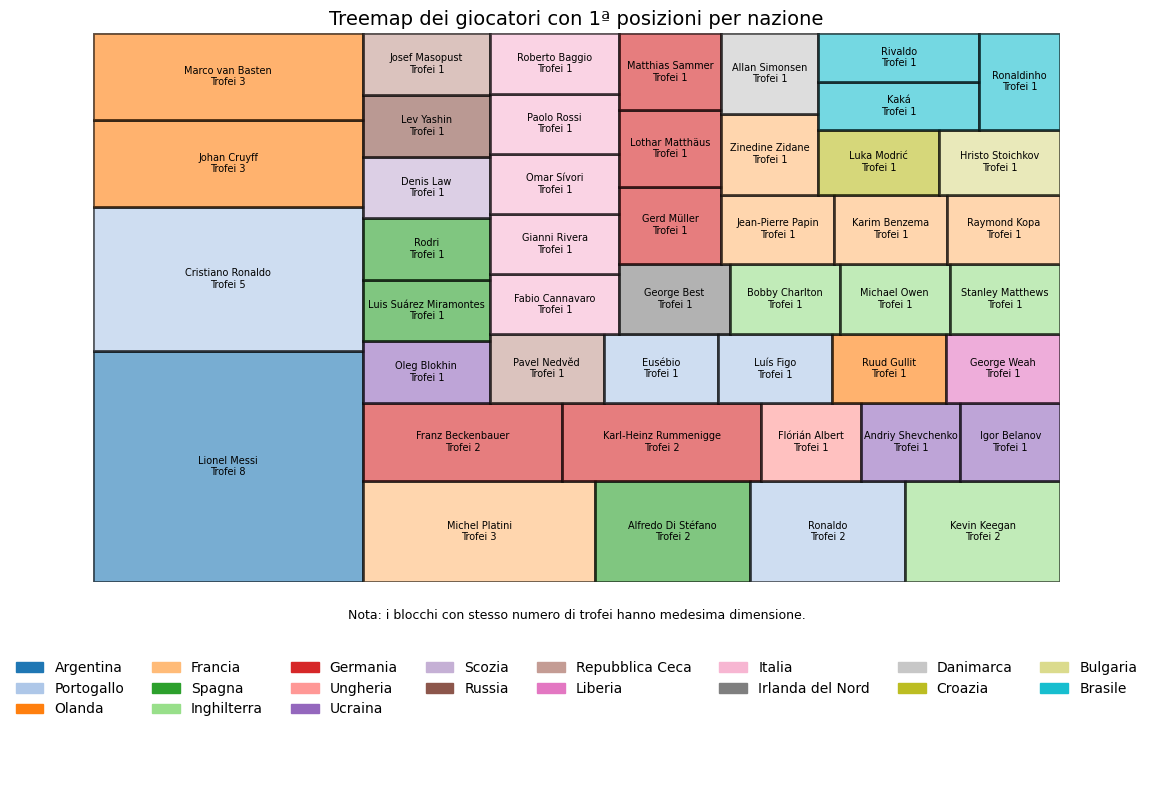

In [38]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import squarify

# Prepara dati
df_treemap = df_player_group.sort_values('count', ascending=False)

# Colori per nazionalità
nations = df_treemap['nazionality'].unique()
color_map = {naz: plt.cm.tab20(i/len(nations)) for i, naz in enumerate(nations)}

# Crea figura con 2 subplot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [3, 1]})

# Treemap
squarify.plot(
    sizes=df_treemap['count'],
    label=[f"{row['player']}\nTrofei {row['count']}" for _, row in df_treemap.iterrows()],
    color=[color_map[naz] for naz in df_treemap['nazionality']],
    alpha=0.6,
    text_kwargs={'fontsize': 7},
    edgecolor='black',
    linewidth=2,
    ax=ax1
)
ax1.set_title('Treemap dei giocatori con 1ª posizioni per nazione', fontsize=14)
ax1.axis('off')

# Legenda
patches = [mpatches.Patch(color=color_map[naz], label=naz) for naz in nations]
ax2.legend(handles=patches, loc='center', ncol=8, frameon=False)
ax2.axis('off')

# Nota
fig.text(0.5, 0.22, 'Nota: i blocchi con stesso numero di trofei hanno medesima dimensione.', 
         ha='center', fontsize=9)

plt.tight_layout()
plt.show()

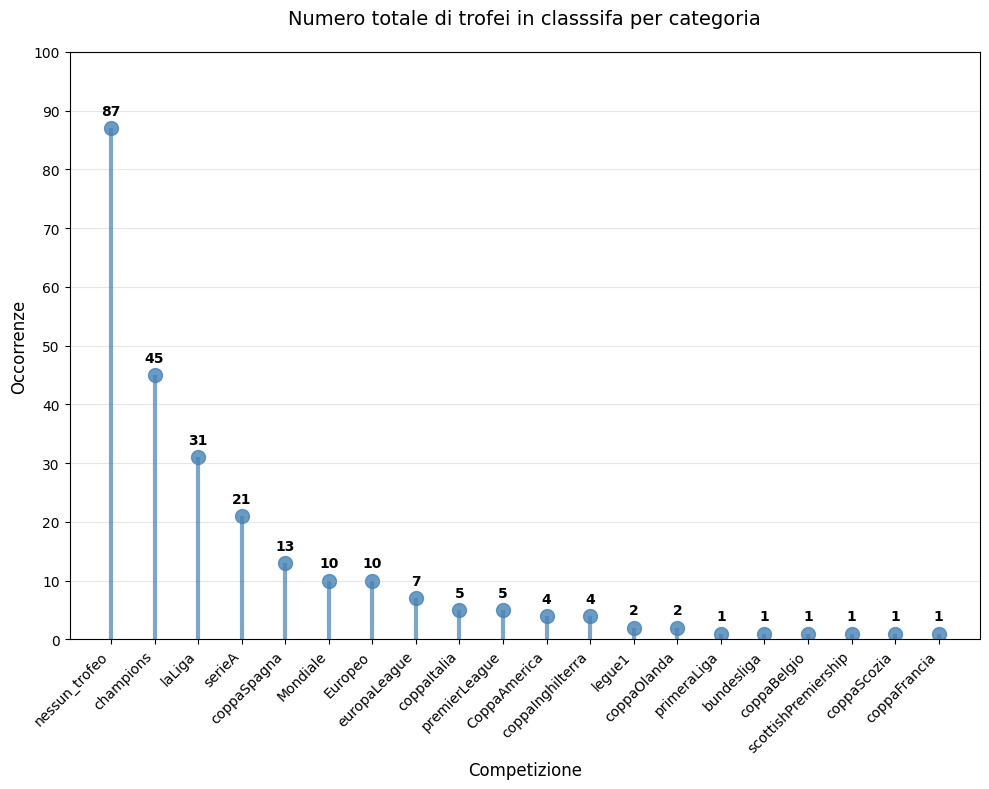

In [72]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 8))

y_pos = np.arange(len(trophy_rank_df_final)) 

# Steli
ax.vlines(x=y_pos, ymin=0, ymax=trophy_rank_df_final['total'], 
          colors='steelblue', alpha=0.7, linewidth=3)

# Pallini
ax.scatter(y_pos, df_sorted['total'], s=100, color='steelblue', alpha=0.8) #edgecolors='black', linewidth=1

# Valori sopra i pallini
for i, value in enumerate(trophy_rank_df_final['total']):
    ax.text(i, value + max(trophy_rank_df_final['total']) * 0.02, f'{value}', 
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Imposta l'asse y da 0 a 90 con tacchette ogni 10
ax.set_ylim(0, 100)
ax.set_yticks(np.arange(0, 101, 10))

ax.set_xticks(y_pos)
ax.set_xticklabels(df_sorted['trophy'], rotation=45, ha='right')
ax.set_ylabel('Occorrenze', fontsize=12)
ax.set_xlabel('Competizione', fontsize=12)
ax.set_title('Numero totale di trofei in classsifa per categoria', 
             fontsize=14, pad=20)

# Styling
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()